## **Exercício 1: Regressão linear**

Renan Hideo Watanabe NUSP.: 4777842

Sophia Celine Rafael Alves Pereira NUSP.: 11803994

## **Adquirindo os dados de teste**

Importação de bibliotecas:

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

Obtenção dos dados do exercício:

In [ ]:
%cd
!mkdir csv
%cd csv
!wget https://media.githubusercontent.com/media/psi3471/datasets/main/used_cars_dataset/vehicles_cleaned_train.csv

/root
/root/csv
--2024-03-31 21:33:48--  https://media.githubusercontent.com/media/psi3471/datasets/main/used_cars_dataset/vehicles_cleaned_train.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 555366 (542K) [text/plain]
Saving to: ‘vehicles_cleaned_train.csv’

vehicles_cleaned_tr 100%[===================>] 542.35K  --.-KB/s    in 0.04s   

2024-03-31 21:33:49 (12.4 MB/s) - ‘vehicles_cleaned_train.csv’ saved [555366/555366]



In [101]:
cars_data = pd.read_csv("vehicles_cleaned_train.csv")

In [102]:
cars_data

,price,year,condition,cylinders,fuel,odometer,transmission,size,type
0,10400,2011,excellent,4 cylinders,gas,81300,automatic,mid-size,sedan
1,6900,2007,excellent,6 cylinders,gas,79000,automatic,full-size,sedan
2,18900,2018,like new,4 cylinders,gas,5000,automatic,full-size,sedan
3,6000,2010,excellent,4 cylinders,gas,97600,automatic,mid-size,hatchback
4,19995,2013,good,6 cylinders,gas,95782,automatic,mid-size,sedan
...,...,...,...,...,...,...,...,...,...
8333,28988,2017,excellent,4 cylinders,gas,35178,automatic,mid-size,coupe
8334,17999,2018,excellent,4 cylinders,gas,87800,automatic,compact,hatchback
8335,5900,2003,excellent,6 cylinders,gas,57612,automatic,full-size,sedan
8336,15990,2016,excellent,4 cylinders,gas,60423,automatic,compact,sedan


## **Verificação da contribuição de cada parâmetro no preço dos carros**

Foram executados os seguintes passos para averiguar a contribuição de cada variável no preço dos carros:

* Filtragem dos carros caros (preço > $20000)
* Somatório dos preços dos carros conforme as categorias



In [ ]:
carrosCaros = cars_data.where(cars_data['price'] > 20000).dropna()
aggregated_data = pd.DataFrame()

for column in ['fuel', 'size', 'transmission', 'type', 'condition', 'year', 'cylinders']:
    temp = carrosCaros.groupby(column)['price'].sum().reset_index()
    temp['category'] = column
    temp.columns = ['value', 'price', 'category']
    aggregated_data = pd.concat([aggregated_data, temp])

# Plot do gráfico
fig = px.bar(aggregated_data, x='price', y='value', color='category', orientation='h',
             title='Comparação do Preço Total por Categoria de Características dos Carros Caros',
             labels={'value': 'Categoria', 'price': 'Preço Total ($)'},
             color_discrete_map={
                 'fuel': 'lightgray', 'size': 'orchid', 'transmission': 'gold', 'type': 'darkcyan', 'condition': 'yellowgreen', 'year': 'skyblue', 'cylinders': 'deeppink'
             })

# Atualizando o layout para melhor visualização
fig.update_layout(height=750, showlegend=True)

fig.show()

Para tratar os dados, divide-se o preço e o valor do odômetro por 1000 para evitar lidar com valores muito grandes nas aproximações e, portanto, evitar problemas numéricos. Além disso, desconta-se o ano do carro mais velho do dataframe, para obter um intervalo de dados com valores menores nessa coluna.

In [103]:
# Transformação em variáveis categóricas
data = pd.get_dummies(cars_data, columns=['condition', 'cylinders', 'transmission', 'size', 'type', 'fuel'], drop_first=True)

In [104]:
data

,price,year,odometer,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_6 cylinders,transmission_manual,size_full-size,size_mid-size,size_sub-compact,type_hatchback,type_sedan,type_wagon,fuel_gas
0,10400,2011,81300,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,6900,2007,79000,0,0,0,0,0,1,0,1,0,0,0,1,0,1
2,18900,2018,5000,0,0,1,0,0,0,0,1,0,0,0,1,0,1
3,6000,2010,97600,0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,19995,2013,95782,0,1,0,0,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8333,28988,2017,35178,0,0,0,0,0,0,0,0,1,0,0,0,0,1
8334,17999,2018,87800,0,0,0,0,0,0,0,0,0,0,1,0,0,1
8335,5900,2003,57612,0,0,0,0,0,1,0,1,0,0,0,1,0,1
8336,15990,2016,60423,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [105]:
# Transformações para evitar problemas numéricos
data['year'] = data['year'] - data['year'].min()
data['odometer'] = data['odometer']/1000

In [106]:
data

,price,year,odometer,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_6 cylinders,transmission_manual,size_full-size,size_mid-size,size_sub-compact,type_hatchback,type_sedan,type_wagon,fuel_gas
0,10400,10,81.300,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,6900,6,79.000,0,0,0,0,0,1,0,1,0,0,0,1,0,1
2,18900,17,5.000,0,0,1,0,0,0,0,1,0,0,0,1,0,1
3,6000,9,97.600,0,0,0,0,0,0,0,0,1,0,1,0,0,1
4,19995,12,95.782,0,1,0,0,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8333,28988,16,35.178,0,0,0,0,0,0,0,0,1,0,0,0,0,1
8334,17999,17,87.800,0,0,0,0,0,0,0,0,0,0,1,0,0,1
8335,5900,2,57.612,0,0,0,0,0,1,0,1,0,0,0,1,0,1
8336,15990,15,60.423,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [107]:
# Análise da correlação entre os dados e o preço, considerando linearidade

data.corr()['price']

price                    1.000000
year                     0.520877
odometer                -0.380056
condition_fair          -0.096375
condition_good          -0.199158
condition_like new       0.154598
condition_new            0.016947
condition_salvage       -0.042552
cylinders_6 cylinders    0.052542
transmission_manual      0.042481
size_full-size           0.044076
size_mid-size            0.034790
size_sub-compact         0.004983
type_hatchback          -0.048522
type_sedan              -0.047014
type_wagon               0.042593
fuel_gas                 0.012198
Name: price, dtype: float64

Analisando os valores de correlação considerando linearidade, valores próximos de zero significam que não há linearidade entre o dado e o valor do preço. Nesse caso, consideramos valores de correlação menores do que 0.1 para descartar dados. Assim, os dados que devem interferir significativamente no preço segundo esse critério são:

- year
- odometry
- condition_good
- condition_like_new

In [108]:
# Verificação da correlação entre os dados considerando não linearidades

# Para dados lineares (odometria e ano), utiliza-se o método padrão de correlação. Para dados dicotômicos (caso das variáveis dummy), utiliza-se a análise do
# coeficiente de correlação ponto bisserial

from scipy.stats import pointbiserialr

print('fuel: ', pointbiserialr(data['price'], data['fuel_gas']))
print('year: ', data['price'].corr(data['year']))
print('odometer: ', data['price'].corr(data['odometer']))
print('condition fair: ', pointbiserialr(data['price'], data['condition_fair']))
print('condition good: ', pointbiserialr(data['price'], data['condition_good']))
print('condition like new: ', pointbiserialr(data['price'], data['condition_like new']))
print('condition new: ', pointbiserialr(data['price'], data['condition_new']))
print('condition salvage: ', pointbiserialr(data['price'], data['condition_salvage']))
print('cylinders: ', pointbiserialr(data['price'], data['cylinders_6 cylinders']))
print('trasnmission: ', pointbiserialr(data['price'], data['transmission_manual']))
print('size full-size: ', pointbiserialr(data['price'], data['size_full-size']))
print('size mid-size: ', pointbiserialr(data['price'], data['size_mid-size']))
print('size sub-compact: ', pointbiserialr(data['price'], data['size_sub-compact']))
print('type_hatchback: ', pointbiserialr(data['price'], data['type_hatchback']))
print('type_sedan: ', pointbiserialr(data['price'], data['type_sedan']))
print('type_wagon: ', pointbiserialr(data['price'], data['type_wagon']))

fuel:  SignificanceResult(statistic=0.012198489401151544, pvalue=0.26538609851355055)
year:  0.5208769343638311
odometer:  -0.38005560821186024
condition fair:  SignificanceResult(statistic=-0.09637535598774087, pvalue=1.1496677144614897e-18)
condition good:  SignificanceResult(statistic=-0.19915805072157566, pvalue=2.4047448674131906e-75)
condition like new:  SignificanceResult(statistic=0.15459795478634225, pvalue=9.150816506731325e-46)
condition new:  SignificanceResult(statistic=0.016947493938458746, pvalue=0.12176689738111722)
condition salvage:  SignificanceResult(statistic=-0.04255164229485033, pvalue=0.00010162417450156962)
cylinders:  SignificanceResult(statistic=0.05254182293309069, pvalue=1.5840481042677666e-06)
trasnmission:  SignificanceResult(statistic=0.042480630377553986, pvalue=0.00010437539374937312)
size full-size:  SignificanceResult(statistic=0.04407572014485797, pvalue=5.672794314156042e-05)
size mid-size:  SignificanceResult(statistic=0.034790306404830655, pvalue

Outro critério para analisar os dados é utilizar a correlação ponto bisserial, que indica a correlação entre um dado contínuo (preço) e um dado dicotômico para as variáveis dummy. Nesse caso, analisamos o pvalue, o qual indica o intervalo de confiança da análise, ou seja, quanto menor o pvalue, maior a chance de a relação entre os dados ser significativa estatisticamente. Nesse caso, consideramos um valor padrão de 0.05, acima do qual os dados podem ser descartados. Assim, os dados que devem possuir relação significativa com o preço do carro segundo esse critério são:

- condition_fair
- condition_good
- condition_like_new
- condition_salvage
- cylinders
- transmission
- size_full-size
- size_mid-size
- type_hatchback
- type_sedan
- type_wagon

Dito isso, vamos considerar o valor de correlação linear para as variáveis contínuas e o ponto bisserial para as variáveis dummy. Desse modo, as variáveis que serão **descartadas** segundo as análises são:

 - fuel
 - condition_new
 - size_sub-compact

In [109]:
# Descarte dos dados de combustível e do preço para o treinamento
data = data.drop('fuel_gas', axis=1)
data = data.drop('price', axis=1)
data = data.drop('size_sub-compact', axis=1)
data = data.drop('condition_new', axis=1)

In [110]:
data

,year,odometer,condition_fair,condition_good,condition_like new,condition_salvage,cylinders_6 cylinders,transmission_manual,size_full-size,size_mid-size,type_hatchback,type_sedan,type_wagon
0,10,81.300,0,0,0,0,0,0,0,1,0,1,0
1,6,79.000,0,0,0,0,1,0,1,0,0,1,0
2,17,5.000,0,0,1,0,0,0,1,0,0,1,0
3,9,97.600,0,0,0,0,0,0,0,1,1,0,0
4,12,95.782,0,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8333,16,35.178,0,0,0,0,0,0,0,1,0,0,0
8334,17,87.800,0,0,0,0,0,0,0,0,1,0,0
8335,2,57.612,0,0,0,0,1,0,1,0,0,1,0
8336,15,60.423,0,0,0,0,0,0,0,0,0,1,0


In [111]:
# Construção do vetor de treinamento
ones = np.ones(data.shape[0]).reshape(-1, 1)
X = data.copy()
X.insert(0, "ones", ones)

In [112]:
X

,ones,year,odometer,condition_fair,condition_good,condition_like new,condition_salvage,cylinders_6 cylinders,transmission_manual,size_full-size,size_mid-size,type_hatchback,type_sedan,type_wagon
0,1.0,10,81.300,0,0,0,0,0,0,0,1,0,1,0
1,1.0,6,79.000,0,0,0,0,1,0,1,0,0,1,0
2,1.0,17,5.000,0,0,1,0,0,0,1,0,0,1,0
3,1.0,9,97.600,0,0,0,0,0,0,0,1,1,0,0
4,1.0,12,95.782,0,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8333,1.0,16,35.178,0,0,0,0,0,0,0,1,0,0,0
8334,1.0,17,87.800,0,0,0,0,0,0,0,0,1,0,0
8335,1.0,2,57.612,0,0,0,0,1,0,1,0,0,1,0
8336,1.0,15,60.423,0,0,0,0,0,0,0,0,0,1,0


In [113]:
X = X.to_numpy()

In [114]:
# Vetor final de dados de treinamento
X

array([[ 1.   , 10.   , 81.3  , ...,  0.   ,  1.   ,  0.   ],
       [ 1.   ,  6.   , 79.   , ...,  0.   ,  1.   ,  0.   ],
       [ 1.   , 17.   ,  5.   , ...,  0.   ,  1.   ,  0.   ],
       ...,
       [ 1.   ,  2.   , 57.612, ...,  0.   ,  1.   ,  0.   ],
       [ 1.   , 15.   , 60.423, ...,  0.   ,  1.   ,  0.   ],
       [ 1.   , 17.   , 19.   , ...,  0.   ,  1.   ,  0.   ]])

## **Regressão Linear Multivariada**

A função de Regressão Linear foi adaptada da função apresentada durante as aulas:

In [115]:
def RL(X, d):
    """
    Função que implementa a regressão linear

    X --> dados de entrada
    d --> vetor que contem o sinal desejado ou rótulo

    A função retorna um vetor coluna com m + 1 elementos (dependendo da quantidade de parãmetros)
    """
    N = d.shape[0]

    R = X.T @ X
    p = X.T @ d

    # vetor de pesos
    wo = np.linalg.solve(R, p)

    # vetor de erro
    e = d - X @ wo

    return wo, e

In [126]:
d = cars_data['price'].to_numpy()
wo, e = RL(X, d)

Além da função RL, também é necessária a função de inferência para estimar os preços de acordo com os pesos obtidos:

In [117]:
def inferencia(wo, X):
  """
  Função que realiza a inferência usando os pesos calculados no treinamento
  wo é o vetor de pesos obtido no treinamento
  X é po vetor de dados de entrada nos quais será realizada a inferência de preço
  """
  m = wo.shape[0]
  N = X.shape[0]
  dn = np.zeros((N, 1))

  for i in range(m):
    if i == 0:
      dn = wo[0] * X[:, 0]
    else:
      dn += wo[i] * X[:, i]

  return dn

In [127]:
# inferência nos dados de treinamento
dn = inferencia(wo, X)

In [128]:
dn

array([ 8379.59955714,  8091.05039397, 17795.34123959, ...,
        5870.61992233, 12467.6503616 , 17164.76210551])

In [129]:
d

array([10400,  6900, 18900, ...,  5900, 15990, 11995])

In [130]:
# Vetor de erro do preço real e do preço estimado nos dados de treinamento
erro = dn - d

In [133]:
# Erro quadrático nos dados de treinamento
(erro**2).mean()

27651895.236513764

In [151]:
# Raiz do erro quadrático nos dados de treinamento
(np.sqrt(erro**2)).mean()

3655.678778003432

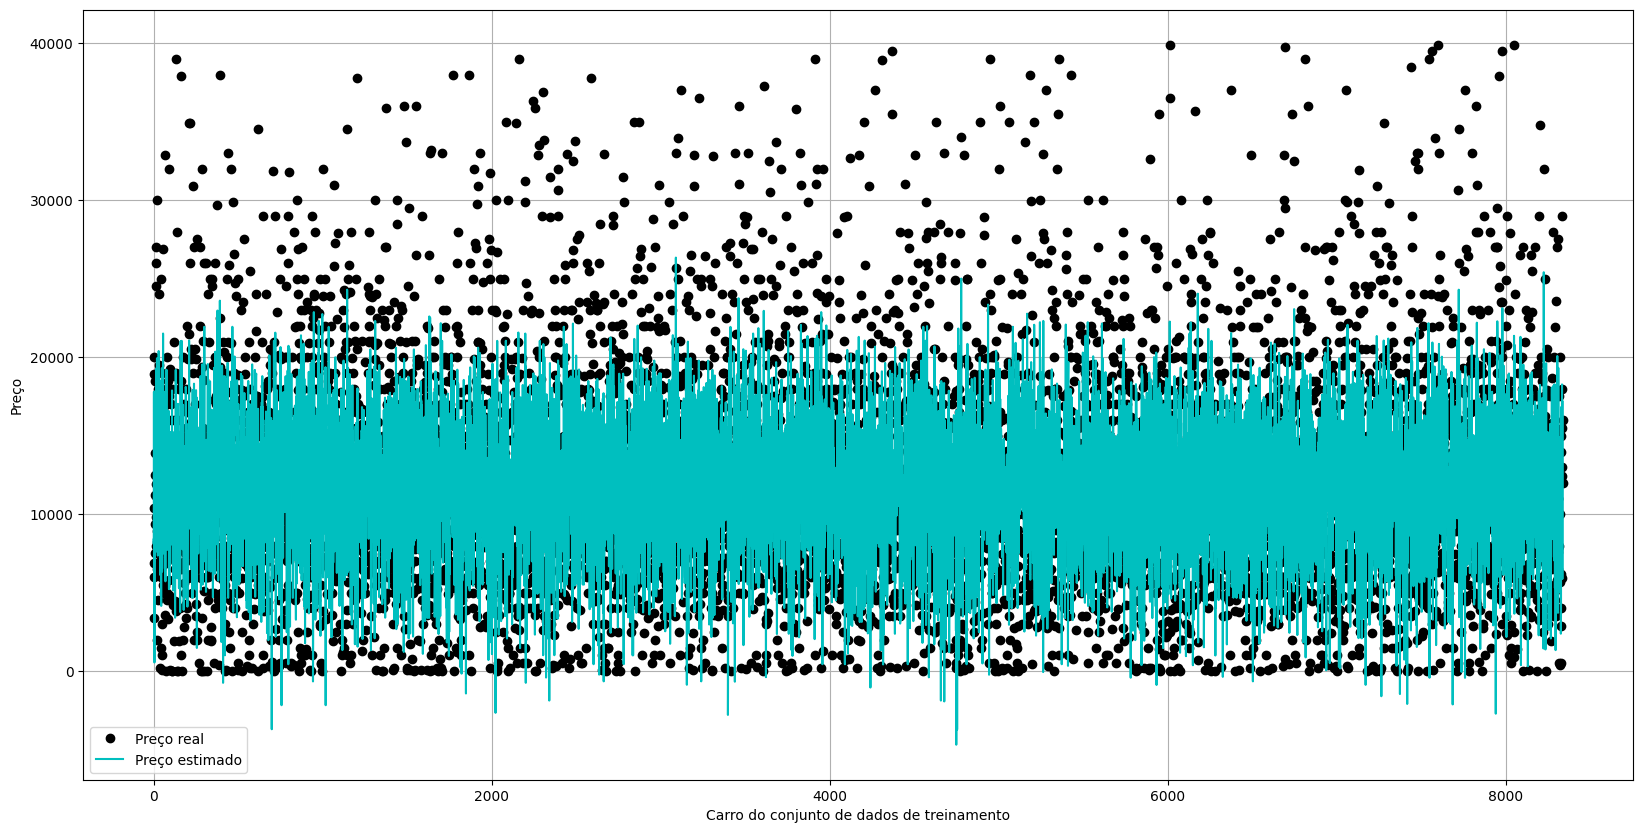

In [134]:
dn = pd.DataFrame(dn, columns = ['price'])

plt.figure(figsize=(20, 10))

ncarros = 8338 # número de carros analisados no gráfico

plt.plot(cars_data['price'][:ncarros].index, cars_data['price'][:ncarros], "ko")
plt.plot(dn[:ncarros].index, dn[:ncarros], "c")


#Formatando o grafico:
plt.grid()
plt.xlabel("Carro do conjunto de dados de treinamento")
plt.ylabel("Preço")

plt.legend(["Preço real", "Preço estimado"])

## **Dados de teste**

In [135]:
!wget https://media.githubusercontent.com/media/psi3471/datasets/main/used_cars_dataset/vehicles_cleaned_test.csv

--2024-03-31 23:38:47--  https://media.githubusercontent.com/media/psi3471/datasets/main/used_cars_dataset/vehicles_cleaned_test.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 138560 (135K) [text/plain]
Saving to: ‘vehicles_cleaned_test.csv’

vehicles_cleaned_te 100%[===================>] 135.31K  --.-KB/s    in 0.02s   

2024-03-31 23:38:48 (5.89 MB/s) - ‘vehicles_cleaned_test.csv’ saved [138560/138560]



In [136]:
dados_teste = pd.read_csv('vehicles_cleaned_test.csv')

In [137]:
dados_teste

,price,year,condition,cylinders,fuel,odometer,transmission,size,type
0,11995,2018,excellent,4 cylinders,gas,19000,automatic,mid-size,sedan
1,20500,2017,excellent,6 cylinders,gas,68000,automatic,full-size,sedan
2,15800,2018,like new,4 cylinders,gas,41200,automatic,full-size,sedan
3,20980,2015,excellent,6 cylinders,gas,82845,automatic,mid-size,sedan
4,13999,2019,like new,4 cylinders,gas,29638,automatic,full-size,sedan
...,...,...,...,...,...,...,...,...,...
2079,15895,2017,like new,4 cylinders,gas,33734,automatic,mid-size,sedan
2080,14390,2017,excellent,4 cylinders,gas,71219,automatic,mid-size,sedan
2081,17995,2018,like new,4 cylinders,gas,37000,automatic,mid-size,sedan
2082,8900,2011,like new,6 cylinders,gas,45346,automatic,full-size,sedan


In [139]:
# Tratamento dos dados de teste
test_data = pd.get_dummies(dados_teste, columns=['condition', 'cylinders', 'transmission', 'size', 'type', 'fuel'], drop_first=True)
test_data = test_data.drop('fuel_gas', axis=1)
test_data = test_data.drop('price', axis=1)
test_data = test_data.drop('size_sub-compact', axis=1)
test_data = test_data.drop('condition_new', axis=1)
test_data['year'] = test_data['year'] - test_data['year'].min()
test_data['odometer'] = test_data['odometer']/1000

In [140]:
test_data

,year,odometer,condition_fair,condition_good,condition_like new,condition_salvage,cylinders_6 cylinders,transmission_manual,size_full-size,size_mid-size,type_hatchback,type_sedan,type_wagon
0,17,19.000,0,0,0,0,0,0,0,1,0,1,0
1,16,68.000,0,0,0,0,1,0,1,0,0,1,0
2,17,41.200,0,0,1,0,0,0,1,0,0,1,0
3,14,82.845,0,0,0,0,1,0,0,1,0,1,0
4,18,29.638,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079,16,33.734,0,0,1,0,0,0,0,1,0,1,0
2080,16,71.219,0,0,0,0,0,0,0,1,0,1,0
2081,17,37.000,0,0,1,0,0,0,0,1,0,1,0
2082,10,45.346,0,0,1,0,1,0,1,0,0,1,0


In [141]:
# Construção do vetor de dados de teste
ones = np.ones(test_data.shape[0]).reshape(-1, 1)
test_data = test_data.copy()
test_data.insert(0, "ones", ones)

In [142]:
test_data = test_data.to_numpy()

In [143]:
test_data.shape

(2084, 14)

In [144]:
dtest = dados_teste['price']

In [145]:
# Inferência nos dados de teste
d_inf = inferencia(wo, test_data)

In [146]:
d_inf

array([17164.76210551, 16809.35889875, 16016.93562165, ...,
       16365.52107584, 13100.59075158, 13520.82333721])

In [147]:
# Vetor de erro entre o preço real e o preço estimado nos dados de teste
erro_teste = dtest - d_inf

### Erro nos dados de teste

In [153]:
# Erro quadrático
(erro_teste**2).mean()

26190321.08136291

In [150]:
(np.sqrt((erro_teste**2))).mean()

3585.450000735596

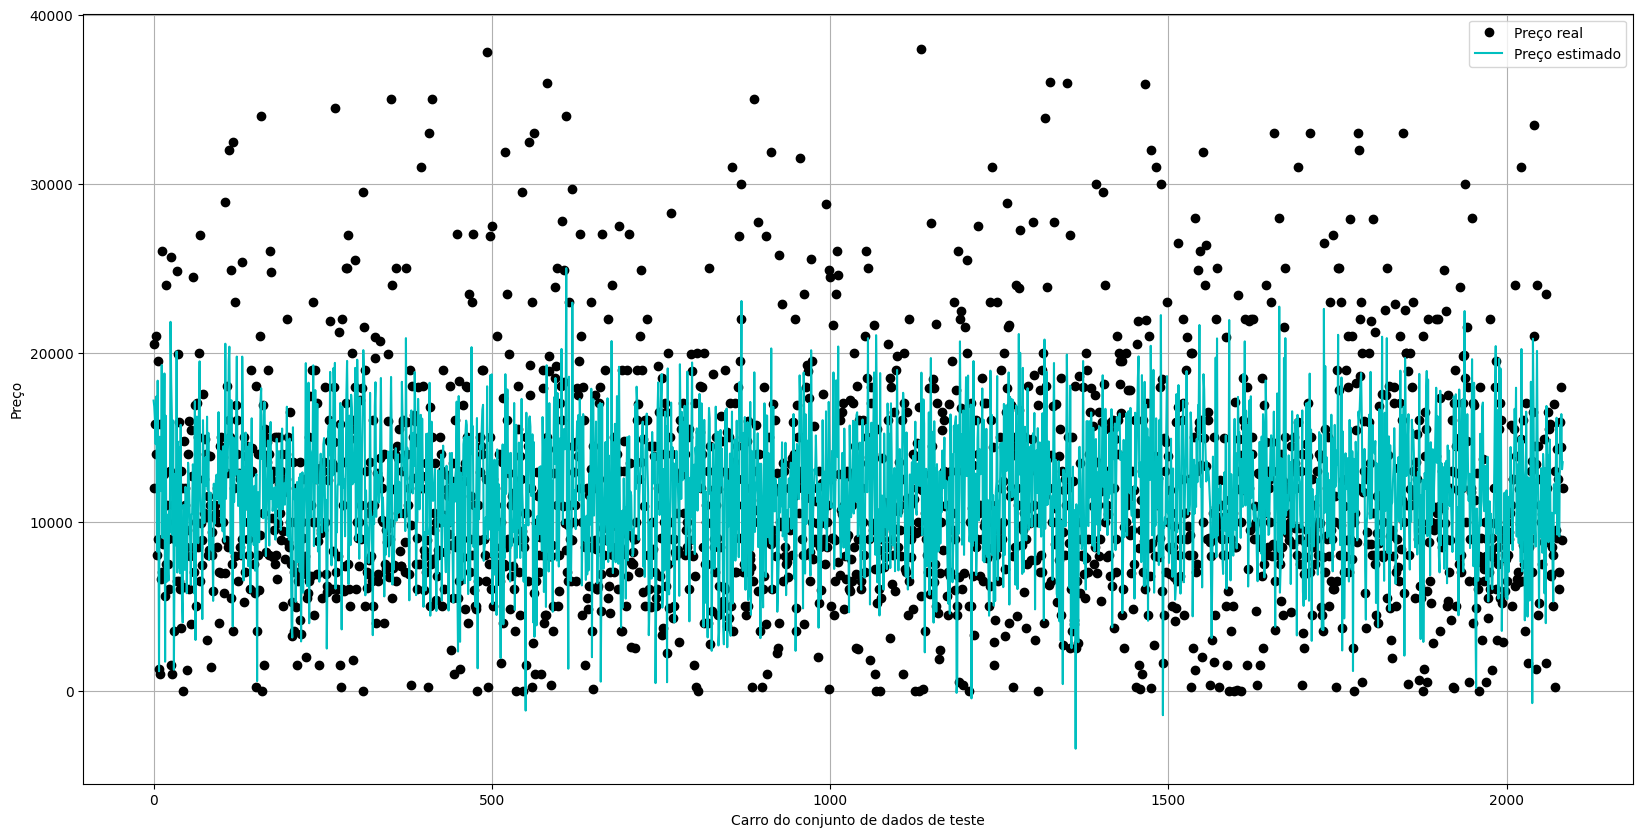

In [152]:
d_inf = pd.DataFrame(d_inf, columns = ['price'])
plt.figure(figsize=(20, 10))

ncarros = 2084 # número de carros analisados no gráfico

plt.plot(dados_teste['price'][:ncarros].index, dados_teste['price'][:ncarros], "ko")
plt.plot(d_inf[:ncarros].index, d_inf[:ncarros], "c")


#Formatando o grafico:
plt.grid()
plt.xlabel("Carro do conjunto de dados de teste")
plt.ylabel("Preço")

plt.legend(["Preço real", "Preço estimado"])